In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
bank = pd.read_csv('bank.csv.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
bank['y'] = bank['y'].replace({'no':0, 'yes':1})

In [5]:
bank['month'].replace(['jan','feb','mar','apr','may','jun',
                      'jul','aug','sep','oct','nov','dec'],
                     [1,2,3,4,5,6,7,8,9,10,11,12],
                     inplace=True)

In [6]:
bank.shape

(4334, 17)

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4334 non-null   int64 
 1   job        4334 non-null   object
 2   marital    4334 non-null   object
 3   education  4334 non-null   object
 4   default    4334 non-null   object
 5   balance    4334 non-null   int64 
 6   housing    4334 non-null   object
 7   loan       4334 non-null   object
 8   contact    4334 non-null   object
 9   day        4334 non-null   int64 
 10  month      4334 non-null   int64 
 11  duration   4334 non-null   int64 
 12  campaign   4334 non-null   int64 
 13  pdays      4334 non-null   int64 
 14  previous   4334 non-null   int64 
 15  poutcome   4334 non-null   object
 16  y          4334 non-null   int64 
dtypes: int64(9), object(8)
memory usage: 575.7+ KB


In [8]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
bank.describe()

,age,balance,day,month,duration,campaign,pdays,previous,y
count,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000
mean,40.991924,1410.637517,15.913936,6.176050,264.544301,2.806876,39.670974,0.544070,0.115828
std,10.505378,3010.612091,8.216673,2.374798,260.642141,3.129682,99.934062,1.702219,0.320056
min,19.000000,-3313.000000,1.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,67.000000,9.000000,5.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,440.000000,16.000000,6.000000,186.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1464.000000,21.000000,8.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,12.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


In [10]:
bank.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,poutcome
count,4334,4334,4334,4334,4334,4334,4334,4334
unique,12,3,3,2,2,2,3,4
top,management,married,secondary,no,yes,no,cellular,unknown
freq,942,2680,2306,4261,2476,3650,2801,3555


In [11]:
bank['y'].value_counts(0)

0    3832
1     502
Name: y, dtype: int64

In [12]:
X = bank.drop(['y'], axis=1)

In [13]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,10,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,5,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,4,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,6,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,5,226,1,-1,0,unknown


In [14]:
y = bank['y']

In [15]:
# dữ liệu có sự chênh lệch giữa 0 và 1

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
ohe = OneHotEncoder()
ohe = ohe.fit(X[['job', 'marital', 'education', 'default',
               'housing','loan','contact','poutcome']])
X_ohe = ohe.transform(X[['job','marital','education','default',
                        'housing','loan','contact','poutcome']]) 


In [18]:
X_ohe

<4334x31 sparse matrix of type '<class 'numpy.float64'>'
	with 34672 stored elements in Compressed Sparse Row format>

In [19]:
X_ohe_new = X_ohe.toarray()

In [20]:
ohe.get_feature_names_out(['job', 'marital', 'education', 'default',
                           'housing','loan','contact','poutcome'])


array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'default_no', 'default_yes', 'housing_no', 'housing_yes',
       'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'], dtype=object)

In [21]:
X_ohe_new[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [22]:
X_ohe_df = pd.DataFrame(X_ohe_new,
                       columns=ohe.get_feature_names_out(['job', 'marital', 'education', 'default',
                           'housing','loan','contact','poutcome'])
)

In [23]:
X_ohe_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [24]:
X_new = pd.concat([X[['age','balance','day','month','duration',
                     'campaign', 'pdays','previous']], X_ohe_df], axis=1)

In [25]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4334 non-null   int64  
 1   balance              4334 non-null   int64  
 2   day                  4334 non-null   int64  
 3   month                4334 non-null   int64  
 4   duration             4334 non-null   int64  
 5   campaign             4334 non-null   int64  
 6   pdays                4334 non-null   int64  
 7   previous             4334 non-null   int64  
 8   job_admin.           4334 non-null   float64
 9   job_blue-collar      4334 non-null   float64
 10  job_entrepreneur     4334 non-null   float64
 11  job_housemaid        4334 non-null   float64
 12  job_management       4334 non-null   float64
 13  job_retired          4334 non-null   float64
 14  job_self-employed    4334 non-null   float64
 15  job_services         4334 non-null   f

### Cross validation

***** With [ 0.7 : 0.3 ] *****
Score train is  1.0 , score test is 0.89 diff is 0.11
[[1122   22]
 [ 119   38]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1144
           1       0.63      0.24      0.35       157

    accuracy                           0.89      1301
   macro avg       0.77      0.61      0.65      1301
weighted avg       0.87      0.89      0.87      1301

Auc is: 0.8838331254732529


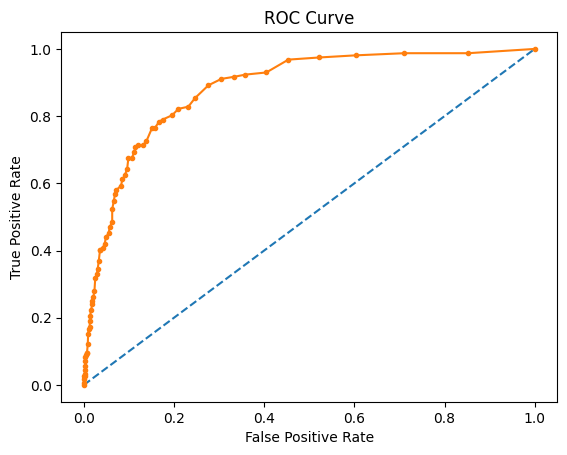

***** With [ 0.75 : 0.25 ] *****
Score train is  1.0 , score test is 0.89 diff is 0.11
[[939  20]
 [ 99  26]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       959
           1       0.57      0.21      0.30       125

    accuracy                           0.89      1084
   macro avg       0.73      0.59      0.62      1084
weighted avg       0.87      0.89      0.87      1084

Auc is: 0.9012095933263816


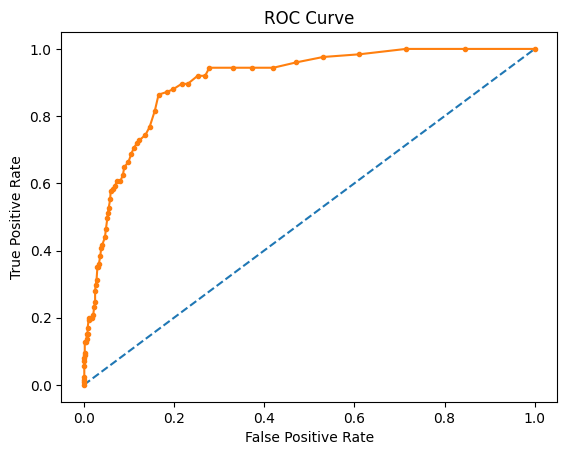

***** With [ 0.8 : 0.2 ] *****
Score train is  1.0 , score test is 0.9 diff is 0.1
[[758  12]
 [ 78  19]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       770
           1       0.61      0.20      0.30        97

    accuracy                           0.90       867
   macro avg       0.76      0.59      0.62       867
weighted avg       0.87      0.90      0.87       867

Auc is: 0.8961507564600347


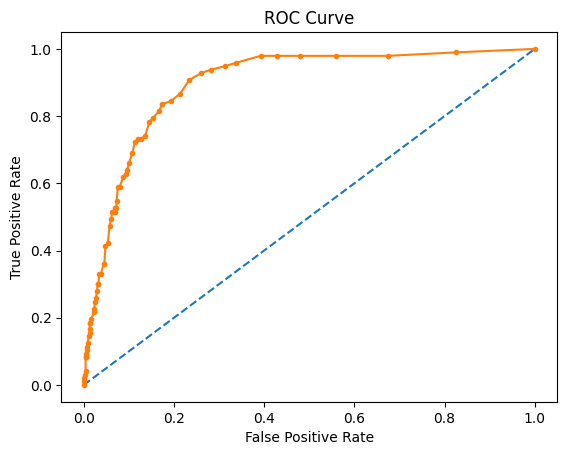

In [32]:
from sklearn.metrics import roc_curve, auc
# 70%, 75%, 80% training and 30%, 25%, 25% test 
test_size_1st = [0.3, 0.25, 0.2]
for i in test_size_1st:
    print("***** With [", 1-i, ":", i, "] *****")
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_new, y,test_size=i)
    
    model= RandomForestClassifier(n_estimators=100) 
    model.fit(X_train_1,y_train_1)
    
    score_train = model.score (X_train_1, y_train_1) 
    score_test = model.score (X_test_1, y_test_1)
    print("Score train is ", round (score_train, 2),
          ", score test is", round (score_test,2),
          "diff is", round (abs (score_train-score_test), 2))
    # Đánh giá model
    y_pred_1 = model.predict(X_test_1) 
    print(confusion_matrix (y_test_1, y_pred_1)) 
    print(classification_report (y_test_1, y_pred_1))
    
    probs = model.predict_proba (X_test_1) 
    scores = probs [:,1]
    fpr, tpr, thresholds = roc_curve (y_test_1, scores) 
    print("Auc is:", auc(fpr, tpr))
    
    plt.plot([0, 1], [0, 1], linestyle= '--')
    plt.plot(fpr, tpr, marker='.')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

In [33]:
# Compare: 70%-30%, 75%-25% and 80%-20%
# 75%-25% is the best

### K-folds

In [34]:
from sklearn import model_selection
from sklearn.model_selection import KFold

In [41]:
model2 = RandomForestClassifier(n_estimators=100)
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
results = model_selection.cross_val_score(model2, X_new, y, cv=kfold)
print('Accuracy: %.3f%% (%.3f%%)' % (result.mean()*100.0,
                                     result.std()*100.0))

Accuracy: 89.709% (1.529%)


In [42]:
results

array([0.89400922, 0.9124424 , 0.90552995, 0.91013825, 0.88683603,
       0.91454965, 0.89376443, 0.86836028, 0.88221709, 0.90993072])

In [43]:
# Nhận xét: Model có tính ổn định khá tốt

# GridSearchCV

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y,
                                                   test_size=i)


In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {
    'n_estimators' : [50,100,200,300],
    'max_features' : ['auto','sqrt','log2'],
    'min_samples_split' : [2,3,4,5,6,7,8,9,10],
    'random_state' : [0,1,42]
}

In [50]:
import datetime
x1 = datetime.datetime.now()
print(x1)

2023-07-25 21:03:26.276196


In [52]:
CV_model = GridSearchCV(estimator=RandomForestClassifier(),
                       param_grid=param_grid,
                       cv=5)

In [53]:
CV_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [50, 100, 200, 300],
                         'random_state': [0, 1, 42]})

In [57]:
print(CV_model.best_params_)

{'max_features': 'auto', 'min_samples_split': 7, 'n_estimators': 100, 'random_state': 42}


In [58]:
x2 = datetime.datetime.now()
print(x2)

2023-07-25 21:43:20.413448


In [59]:
d = x2 - x1
print(d)

0:39:54.137252


In [60]:
y_pred3 = CV_model.predict(X_test)

In [61]:
print('Accuracy: ', accuracy_score(y_test, y_pred3))

Accuracy:  0.8765859284890427


In [62]:
print('The Training R^2 score is: ', CV_model.score(X_train, y_train))
print('The Testing R^2 score is: ', CV_model.score(X_test, y_test))

The Training R^2 score is:  0.9676954139025093
The Testing R^2 score is:  0.8765859284890427


In [64]:
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[742   9]
 [ 98  18]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       751
           1       0.67      0.16      0.25       116

    accuracy                           0.88       867
   macro avg       0.77      0.57      0.59       867
weighted avg       0.85      0.88      0.84       867



### Random search

In [65]:
from sklearn.model_selection import RandomizedSearchCV


In [66]:
param_dist = {
    'n_estimators':[50,100,200,300],
    'max_features':['auto','sqrt','log2'],
    'min_samples_split' : [2,3,4,5,6,7,8,9,10],
    'random_state' : [0,1,42]
}

In [67]:
x1 = datetime.datetime.now()
print(x1)

2023-07-25 21:45:01.065873


In [68]:
forest_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_dist,
    cv=5)

In [69]:
forest_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'random_state': [0, 1, 42]})

In [70]:
forest_random_best = forest_random.best_estimator_
print('Best Model Parameter: ', forest_random.best_params_)

Best Model Parameter:  {'random_state': 42, 'n_estimators': 100, 'min_samples_split': 3, 'max_features': 'log2'}


In [71]:
x2 = datetime.datetime.now()
print(x2)

2023-07-25 21:45:31.248633


In [72]:
y_pred4 = forest_random.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred4))

Accuracy:  0.8765859284890427


In [73]:
print('The Training R^2 score is: ', forest_random.score(X_train, y_train))
print('The Testing R^2 score is: ', forest_random.score(X_test, y_test))

The Training R^2 score is:  0.9982693971733487
The Testing R^2 score is:  0.8765859284890427


In [75]:
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

[[740  11]
 [ 96  20]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       751
           1       0.65      0.17      0.27       116

    accuracy                           0.88       867
   macro avg       0.77      0.58      0.60       867
weighted avg       0.85      0.88      0.84       867



In [ ]:
# Model mất cân bàng dữ liệu dẫn đến kết quả không được tốt